# Imports

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pprint import pprint

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, plot_confusion_matrix

In [2]:
import sjs_utilities as sjs

In [3]:
parse_dates = ['asset_contract.created_date', 'collection.created_date']
df = pd.read_csv('../data/nft_binary.csv', low_memory=False, parse_dates=parse_dates)

# Explore

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44752 entries, 0 to 44751
Data columns (total 49 columns):
is_presale                                            44752 non-null int64
collection.featured                                   44752 non-null int64
asset_contract.dev_seller_fee_basis_points_0          44752 non-null int64
collection.dev_seller_fee_basis_points_0              44752 non-null int64
asset_contract.seller_fee_basis_points_250            44752 non-null int64
asset_contract.opensea_seller_fee_basis_points_250    44752 non-null int64
collection.opensea_seller_fee_basis_points_250        44752 non-null int64
asset_contract.asset_contract_type                    44752 non-null int64
asset_contract.schema_name                            44752 non-null int64
asset_contract.name                                   44752 non-null int64
collection.safelist_request_status                    44752 non-null int64
collection.slug                                       44752 non-nu

In [5]:
df.describe()

,is_presale,collection.featured,asset_contract.dev_seller_fee_basis_points_0,collection.dev_seller_fee_basis_points_0,asset_contract.seller_fee_basis_points_250,asset_contract.opensea_seller_fee_basis_points_250,collection.opensea_seller_fee_basis_points_250,asset_contract.asset_contract_type,asset_contract.schema_name,asset_contract.name,...,creator.discord_id,creator.user.username,description,external_link,image_url,name,owner.config,owner.discord_id,token_metadata,target
count,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,...,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000
mean,0.286043,0.022033,0.930238,0.715633,0.932830,0.997408,0.997386,0.670406,0.670406,0.285127,...,0.005117,0.456940,0.753955,0.406351,0.894508,0.806042,0.106543,0.001140,0.152999,0.602766
std,0.451915,0.146791,0.254749,0.451118,0.250319,0.050847,0.051065,0.470071,0.470071,0.451480,...,0.071351,0.498148,0.430710,0.491157,0.307190,0.395401,0.308534,0.033739,0.359990,0.489331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.head()

,is_presale,collection.featured,asset_contract.dev_seller_fee_basis_points_0,collection.dev_seller_fee_basis_points_0,asset_contract.seller_fee_basis_points_250,asset_contract.opensea_seller_fee_basis_points_250,collection.opensea_seller_fee_basis_points_250,asset_contract.asset_contract_type,asset_contract.schema_name,asset_contract.name,...,description,external_link,image_url,name,owner.config,owner.discord_id,token_metadata,asset_contract.created_date,collection.created_date,target
0,1,0,1,0,1,1,1,0,0,1,...,0,1,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-06-10 01:49:35.180218,0
1,1,0,1,0,1,1,1,0,0,1,...,1,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-05-03 18:55:32.762585,0
2,1,0,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-05-19 07:24:46.125544,0
3,1,0,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-06-29 12:49:00.283468,0
4,1,0,1,0,1,1,1,0,0,1,...,0,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-05-30 16:45:39.254227,0


# Model

In [8]:
SEED = 42 #set for reproduciblity

## Train-Validation Split

In [9]:
df.columns

Index(['is_presale', 'collection.featured',
       'asset_contract.dev_seller_fee_basis_points_0',
       'collection.dev_seller_fee_basis_points_0',
       'asset_contract.seller_fee_basis_points_250',
       'asset_contract.opensea_seller_fee_basis_points_250',
       'collection.opensea_seller_fee_basis_points_250',
       'asset_contract.asset_contract_type', 'asset_contract.schema_name',
       'asset_contract.name', 'collection.safelist_request_status',
       'collection.slug', 'creator.profile_img_url', 'owner.address',
       'owner.profile_img_url', 'traits', 'asset_contract.description',
       'asset_contract.external_link', 'asset_contract.image_url',
       'asset_contract.nft_version', 'asset_contract.opensea_version',
       'asset_contract.symbol', 'asset_contract.total_supply',
       'background_color', 'collection.chat_url', 'collection.description',
       'collection.discord_url', 'collection.display_data.card_display_style',
       'collection.display_data.images

In [10]:
# Define our X and y
X = df.drop(columns=['asset_contract.created_date', 'collection.created_date', 'target'])
y = df['target']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

## Decision Tree

In [11]:
#vanilla tree
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train, y_train)
sjs.crossval(dt, X_train, y_train)

Avg Precision Score of 0.8998 with Std Dev of 0.0050

The scores were: ['0.8976', '0.9055', '0.9057', '0.8973', '0.8930']


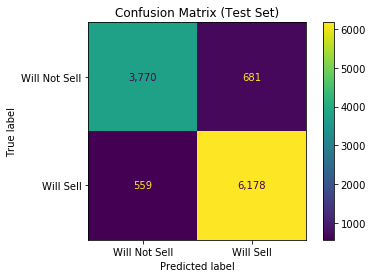

          | Train  | Test   |
          |-----------------|
Precision | 90.84% | 90.07% |
F1 Score  | 91.83% | 90.88% |
ROC-AUC   | 95.60% | 93.72% |


,Model,Precision,F1 Score,ROC-AUC
0,Vanilla Decision Tree,90.07%,90.88%,93.72%


In [12]:
sjs.evaluate('Vanilla Decision Tree', dt, X_train, X_test, y_train, y_test, use_decision_function='no')

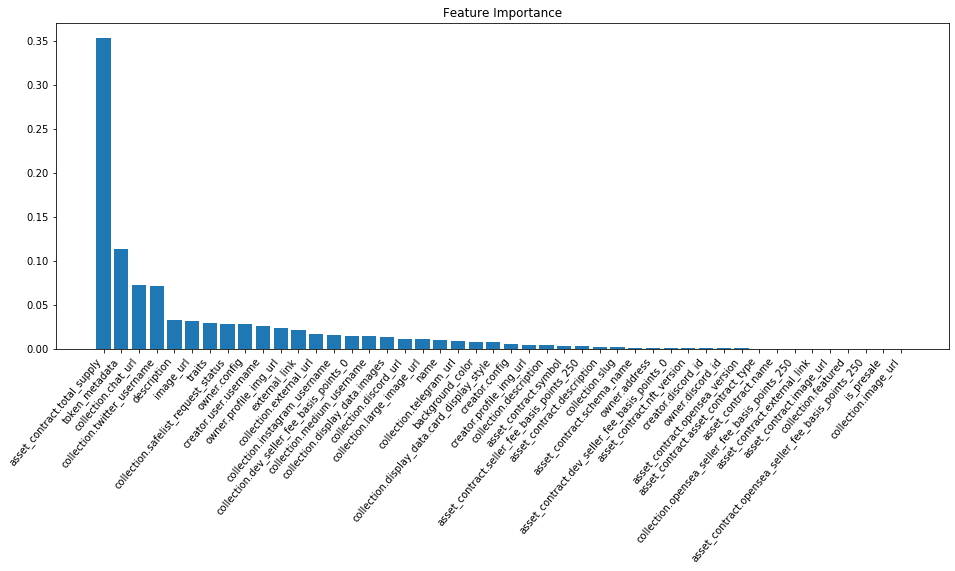

In [13]:
sjs.plot_feature_imp(dt, X)

In [14]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

## Decision Tree Tuned

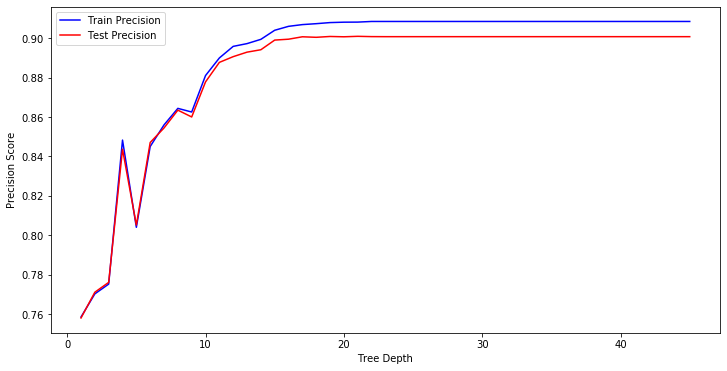

In [15]:
# Identify the optimal tree depth for given data

max_depths = list(range(1,46))
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=SEED)
    dt.fit(X_train, y_train)
    
    train_preds = dt.predict(X_train)
    p_score = precision_score(y_train, train_preds)
    # Add precision score to previous train results
    train_results.append(p_score)
    
    test_preds = dt.predict(X_test)
    p_score = precision_score(y_test, test_preds)
    # Add precision score to previous test results
    test_results.append(p_score)
    
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train Precision')
plt.plot(max_depths, test_results, 'r', label='Test Precision')
plt.ylabel('Precision Score')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

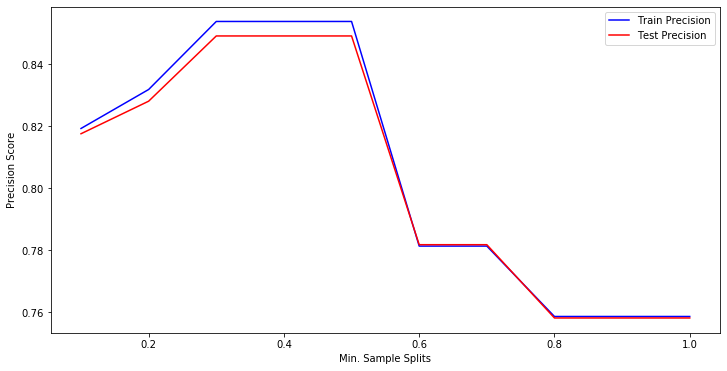

In [16]:
# Identify the optimal min-samples-split for given data

min_samples_splits = np.linspace(0.1, 1, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=SEED)
    dt.fit(X_train, y_train)
    
    train_preds = dt.predict(X_train)
    p_score = precision_score(y_train, train_preds)
    # Add precision score to previous train results
    train_results.append(p_score)
    
    test_preds = dt.predict(X_test)
    p_score = precision_score(y_test, test_preds)
    # Add precision score to previous test results
    test_results.append(p_score)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train Precision')
plt.plot(min_samples_splits, test_results, 'r', label='Test Precision')
plt.ylabel('Precision Score')
plt.xlabel('Min. Sample Splits')
plt.legend()
plt.show()

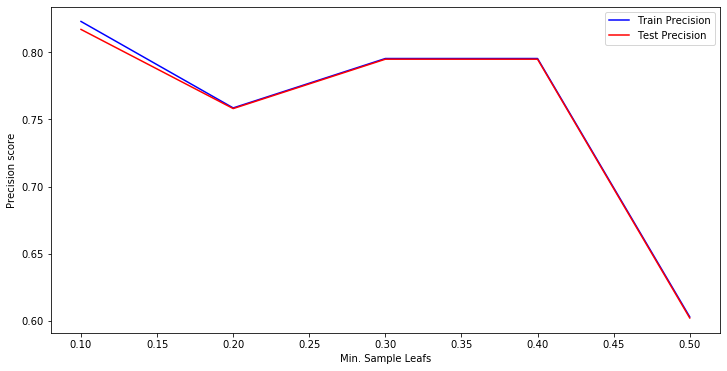

In [17]:
# Calculate the optimal value for minimum sample leafs

min_samples_leafs = np.linspace(.1, .5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=SEED)
    dt.fit(X_train, y_train)
    
    train_preds = dt.predict(X_train)
    p_score = precision_score(y_train, train_preds)
    # Add precision score to previous train results
    train_results.append(p_score)
    
    test_preds = dt.predict(X_test)
    p_score = precision_score(y_test, test_preds)
    # Add precision score to previous test results
    test_results.append(p_score)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train Precision')
plt.plot(min_samples_leafs, test_results, 'r', label='Test Precision')
plt.ylabel('Precision score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

In [18]:
# Train a classifier with optimal values identified above
dt2 = DecisionTreeClassifier(max_depth=46, 
                             min_samples_split=.3, 
                             min_samples_leaf=.3, 
                             random_state=SEED
                            )

dt2.fit(X_train, y_train)
sjs.crossval(dt2, X_train, y_train)

Avg Precision Score of 0.7954 with Std Dev of 0.0011

The scores were: ['0.7971', '0.7946', '0.7940', '0.7954', '0.7956']


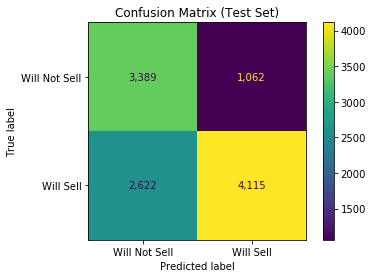

          | Train  | Test   |
          |-----------------|
Precision | 79.54% | 79.49% |
F1 Score  | 68.41% | 69.08% |
ROC-AUC   | 68.29% | 68.61% |


,Model,Precision,F1 Score,ROC-AUC
1,Tuned Decision Tree,79.49%,69.08%,68.61%
0,Vanilla Decision Tree,90.07%,90.88%,93.72%


In [19]:
sjs.evaluate('Tuned Decision Tree', dt2, X_train, X_test, y_train, y_test, use_decision_function='no')

## Random Forest

In [20]:
rf = RandomForestClassifier(random_state=SEED, verbose=2)
rf.fit(X_train, y_train)
sjs.crossval(rf, X_train, y_train)

building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

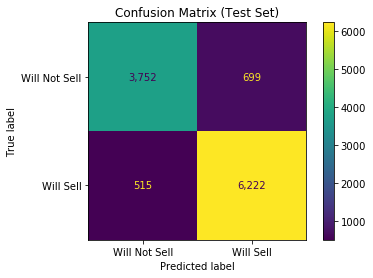

          | Train  | Test   |
          |-----------------|
Precision | 90.63% | 89.90% |
F1 Score  | 91.85% | 91.11% |
ROC-AUC   | 95.51% | 94.54% |


,Model,Precision,F1 Score,ROC-AUC
2,Random Forest,89.90%,91.11%,94.54%
1,Tuned Decision Tree,79.49%,69.08%,68.61%
0,Vanilla Decision Tree,90.07%,90.88%,93.72%


In [21]:
sjs.evaluate('Random Forest', rf, X_train, X_test, y_train, y_test, use_decision_function='no')

In [22]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 2,
 'warm_start': False}

## Random Forest GS

In [23]:
rf2 = RandomForestClassifier(random_state=SEED)

param_grid = {'n_estimators' : [10, 100, 1000],
              'max_features' : [None, 'sqrt', 'log2']}

rf2_gs = GridSearchCV(rf2, param_grid, scoring='precision', cv=5, verbose=2)
rf2_gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................max_features=None, n_estimators=10; total time=   0.5s
[CV] END .................max_features=None, n_estimators=10; total time=   0.5s
[CV] END .................max_features=None, n_estimators=10; total time=   0.8s
[CV] END .................max_features=None, n_estimators=10; total time=   0.8s
[CV] END .................max_features=None, n_estimators=10; total time=   0.6s
[CV] END ................max_features=None, n_estimators=100; total time=   3.8s
[CV] END ................max_features=None, n_estimators=100; total time=   4.5s
[CV] END ................max_features=None, n_estimators=100; total time=   3.5s
[CV] END ................max_features=None, n_estimators=100; total time=   4.6s
[CV] END ................max_features=None, n_estimators=100; total time=   5.0s
[CV] END ...............max_features=None, n_estimators=1000; total time=  34.8s
[CV] END ...............max_features=None, n_esti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             scoring='precision', verbose=2)

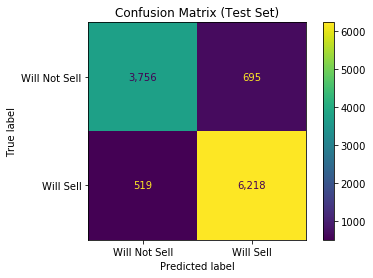

          | Train  | Test   |
          |-----------------|
Precision | 90.55% | 89.95% |
F1 Score  | 91.82% | 91.11% |
ROC-AUC   | 95.48% | 94.47% |


,Model,Precision,F1 Score,ROC-AUC
3,GridSearch Random Forest,89.95%,91.11%,94.47%
2,Random Forest,89.90%,91.11%,94.54%
1,Tuned Decision Tree,79.49%,69.08%,68.61%
0,Vanilla Decision Tree,90.07%,90.88%,93.72%


In [24]:
sjs.evaluate('GridSearch Random Forest', rf2_gs.best_estimator_, X_train, X_test, y_train, y_test, use_decision_function='no')

In [25]:
pprint(rf2_gs.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


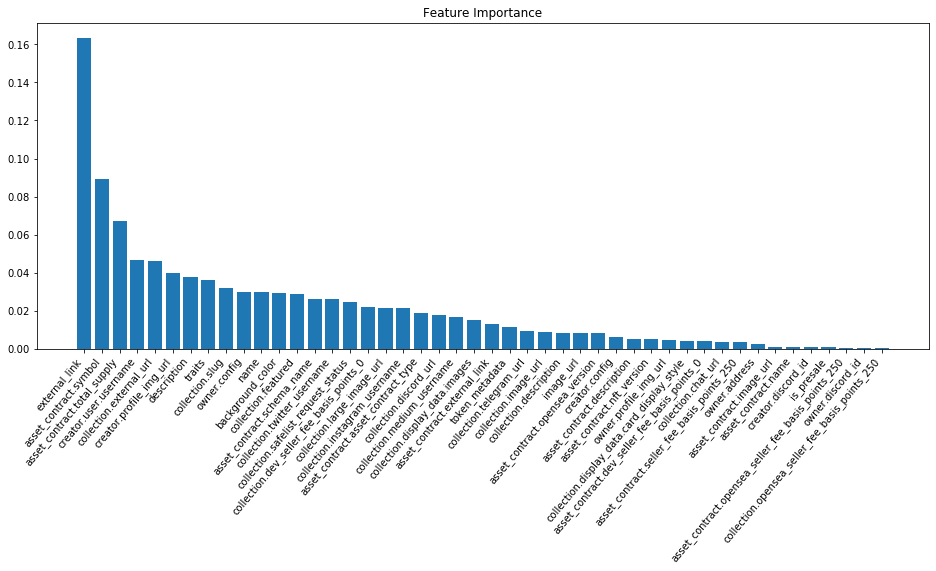

In [26]:
sjs.plot_feature_imp(rf2_gs.best_estimator_, X)

## Gradient Booster

In [27]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
sjs.crossval(GB, X_train, y_train)

Avg Precision Score of 0.8615 with Std Dev of 0.0055

The scores were: ['0.8628', '0.8665', '0.8603', '0.8664', '0.8515']


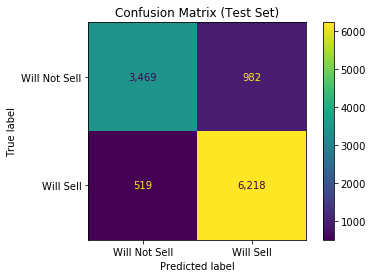

          | Train  | Test   |
          |-----------------|
Precision | 86.43% | 86.36% |
F1 Score  | 89.20% | 89.23% |
ROC-AUC   | 92.85% | 92.61% |


,Model,Precision,F1 Score,ROC-AUC
4,Gradient Boosting,86.36%,89.23%,92.61%
3,GridSearch Random Forest,89.95%,91.11%,94.47%
2,Random Forest,89.90%,91.11%,94.54%
1,Tuned Decision Tree,79.49%,69.08%,68.61%
0,Vanilla Decision Tree,90.07%,90.88%,93.72%


In [28]:
sjs.evaluate('Gradient Boosting', GB, X_train, X_test, y_train, y_test, use_decision_function='no')

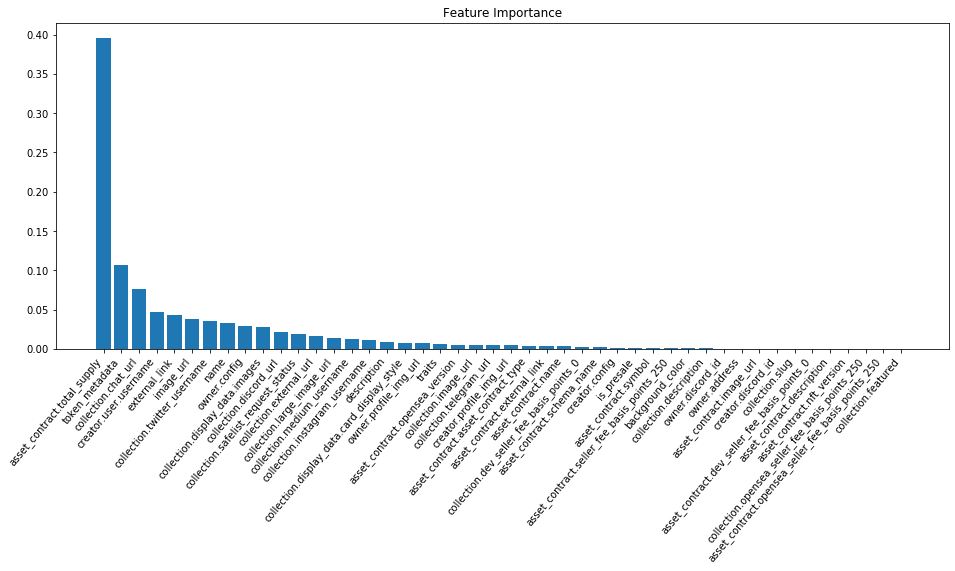

In [29]:
sjs.plot_feature_imp(GB, X)

## XG Boost

In [30]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
sjs.crossval(XGB, X_train, y_train)

Avg Precision Score of 0.8337 with Std Dev of 0.0023

The scores were: ['0.8368', '0.8334', '0.8339', '0.8346', '0.8297']


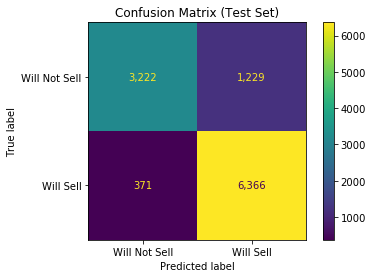

          | Train  | Test   |
          |-----------------|
Precision | 83.81% | 83.82% |
F1 Score  | 88.71% | 88.84% |
ROC-AUC   | 92.70% | 92.49% |


,Model,Precision,F1 Score,ROC-AUC
5,XGBoost,83.82%,88.84%,92.49%
4,Gradient Boosting,86.36%,89.23%,92.61%
3,GridSearch Random Forest,89.95%,91.11%,94.47%
2,Random Forest,89.90%,91.11%,94.54%
1,Tuned Decision Tree,79.49%,69.08%,68.61%
0,Vanilla Decision Tree,90.07%,90.88%,93.72%


In [31]:
sjs.evaluate('XGBoost', XGB, X_train, X_test, y_train, y_test, use_decision_function='no')

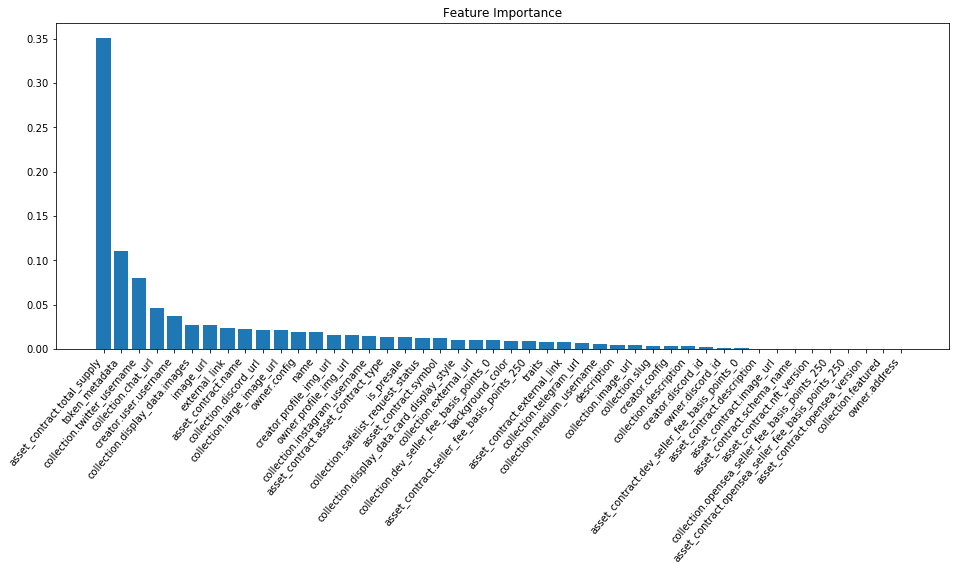

In [32]:
sjs.plot_feature_imp(XGB, X)

## KNN

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
sjs.crossval(knn, X_train, y_train)

Avg Precision Score of 0.8948 with Std Dev of 0.0089

The scores were: ['0.8966', '0.9007', '0.9011', '0.8985', '0.8773']


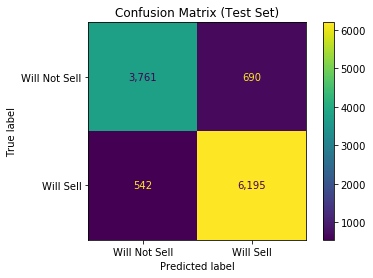

          | Train  | Test   |
          |-----------------|
Precision | 90.20% | 89.98% |
F1 Score  | 91.29% | 90.96% |
ROC-AUC   | 91.96% | 91.08% |


,Model,Precision,F1 Score,ROC-AUC
6,KNN,89.98%,90.96%,91.08%
5,XGBoost,83.82%,88.84%,92.49%
4,Gradient Boosting,86.36%,89.23%,92.61%
3,GridSearch Random Forest,89.95%,91.11%,94.47%
2,Random Forest,89.90%,91.11%,94.54%
1,Tuned Decision Tree,79.49%,69.08%,68.61%
0,Vanilla Decision Tree,90.07%,90.88%,93.72%


In [34]:
sjs.evaluate('KNN', knn, X_train, X_test, y_train, y_test, use_decision_function='no')

## LogReg

In [35]:
lr = LogisticRegression(random_state=SEED)
lr.fit(X_train, y_train)
sjs.crossval(lr, X_train, y_train)

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

Avg Precision Score of 0.8303 with Std Dev of 0.0039

The scores were: ['0.8371', '0.8255', '0.8281', '0.8309', '0.8299']


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


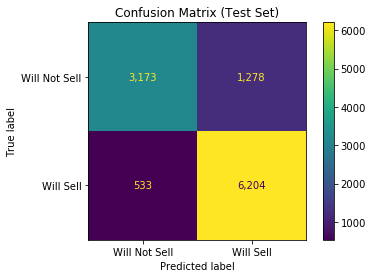

          | Train  | Test   |
          |-----------------|
Precision | 83.18% | 82.92% |
F1 Score  | 87.42% | 87.26% |
ROC-AUC   | 90.28% | 90.15% |


,Model,Precision,F1 Score,ROC-AUC
7,LogReg,82.92%,87.26%,90.15%
6,KNN,89.98%,90.96%,91.08%
5,XGBoost,83.82%,88.84%,92.49%
4,Gradient Boosting,86.36%,89.23%,92.61%
3,GridSearch Random Forest,89.95%,91.11%,94.47%
2,Random Forest,89.90%,91.11%,94.54%
1,Tuned Decision Tree,79.49%,69.08%,68.61%
0,Vanilla Decision Tree,90.07%,90.88%,93.72%


In [36]:
sjs.evaluate('LogReg', lr, X_train, X_test, y_train, y_test, use_decision_function='yes')

## LogReg GS

In [38]:
lr2 = LogisticRegression()

param_grid = {'penalty' : ['l1', 'l2'],
              'C' : [100, 10, 1.0, 0.1, 0.01],
              'class_weight': [None, 'balanced'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}

lr_gs = GridSearchCV(lr2, param_grid, scoring='precision', cv=5, verbose=2)
lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END C=100, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, class_weight=None, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, class_weight=None, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, class_weight=None, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, class_weight=None, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, class_weight=None, penalty=l1, solver=lbfgs; total time=   0.0s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=100, class_weight=None, penalty=l1, solver=liblinear; total time=  10.2s
[CV] END C=100, class_weight=None, penalty=l1, solver=liblinear; total time=  10.4s
[CV] END C=100, class_weight=None, penalty=l1, solver=liblinear; total time=  10.8s
[CV] END C=100, class_weight=None, penalty=l1, solver=liblinear; total time=   8.3s
[CV] END C=100, class_weight=None, penalty=l1, solver=liblinear; total time=   8.0s
[CV] END C=100, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.8s
[CV] END C=100, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END C=100, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END C=100, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END C=100, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=100, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=100, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=100, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=100, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=100, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=l

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   9.3s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   7.1s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   9.5s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   6.6s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   6.9s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.1s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.2s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=100, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=100, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=100, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=100, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=100, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=10, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, class_weight=None, penalty=l1, solver=lbfgs;

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   7.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   8.3s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   6.8s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   5.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=  10.5s
[CV] END C=10, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=10, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=10, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=10, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=10, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.9s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END ..C=10, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END ..C=10, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END ..C=10, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END ..C=10, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END ..C=10, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=lbfgs; total

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   7.3s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   8.9s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   6.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   8.4s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   7.4s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.9s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=10, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=10, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=10, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=10, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.5s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=10, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1.0, class_weight=None, penalty=l1, solver=lbfgs; 

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=1.0, class_weight=None, penalty=l1, solver=liblinear; total time=   9.8s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=liblinear; total time=   9.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=liblinear; total time=  10.5s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=liblinear; total time=  10.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=liblinear; total time=   7.6s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.6s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=1.0, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.2s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=1.0, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=1.0, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=1.0, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=1.0, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=l

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=liblinear; total time=  12.1s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=liblinear; total time=   9.6s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=liblinear; total time=  11.9s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=liblinear; total time=   9.8s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=liblinear; total time=  10.1s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.6s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, class_weight=None, penalty=l1, solver=l

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=0.1, class_weight=None, penalty=l1, solver=liblinear; total time=   2.3s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=liblinear; total time=   2.4s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=liblinear; total time=   3.2s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=liblinear; total time=   4.1s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=liblinear; total time=   2.8s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=0.1, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=0.1, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=0.1, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=0.1, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.2s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=0.1, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=liblinear; total time=   0.2s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, s

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, sol

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=lbfgs; total t

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.01, class_we

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.83061053 0.83061053 0.83139156 0.83061053
        nan        nan 0.87073461 0.87060756 0.87040383 0.87074062
        nan        nan 0.83046062 0.83038162 0.83086083 0.83045435
        nan        nan 0.87064854 0.87065361 0.86979757 0.87059053
        nan        nan 0.82966982 0.82977428 0.83030041 0.82977487
        nan        nan 0.87029854 0.87040229 0.86967739 0.87028036
        nan        nan 0.82790198 0.8282765  0.82842352 0.83420844
        nan        nan 0.85367312 0.85327248 0.8523094  0.8504685
        nan        nan 0.79662    0.81911252 0.81911252 0.82519871
        nan        nan 0.83833232 0.83439549 0.83438059 0.8324433 ]
  category=UserWarning


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='precision', verbose=2)

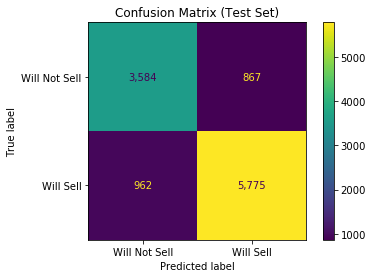

          | Train  | Test   |
          |-----------------|
Precision | 86.99% | 86.95% |
F1 Score  | 86.60% | 86.33% |
ROC-AUC   | 90.31% | 90.13% |


,Model,Precision,F1 Score,ROC-AUC
8,GridSearch LogReg,86.95%,86.33%,90.13%
7,LogReg,82.92%,87.26%,90.15%
6,KNN,89.98%,90.96%,91.08%
5,XGBoost,83.82%,88.84%,92.49%
4,Gradient Boosting,86.36%,89.23%,92.61%
3,GridSearch Random Forest,89.95%,91.11%,94.47%
2,Random Forest,89.90%,91.11%,94.54%
1,Tuned Decision Tree,79.49%,69.08%,68.61%
0,Vanilla Decision Tree,90.07%,90.88%,93.72%


In [39]:
sjs.evaluate('GridSearch LogReg', lr_gs.best_estimator_, X_train, X_test, y_train, y_test, use_decision_function='yes')

In [40]:
lr_gs.best_params_   

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

### Check for Multicollinearity

In [41]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [42]:
X = df.iloc[:,:-3]

In [43]:
pd.options.display.float_format = '{:.2f}'.format
calc_vif(X).sort_values(by=['VIF'], ascending=False)

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
7,asset_contract.asset_contract_type,inf
8,asset_contract.schema_name,inf
5,asset_contract.opensea_seller_fee_basis_points...,45327.97
18,asset_contract.image_url,3602.52
9,asset_contract.name,2289.37
30,collection.image_url,1457.88
2,asset_contract.dev_seller_fee_basis_points_0,1076.21
20,asset_contract.opensea_version,1041.38
4,asset_contract.seller_fee_basis_points_250,929.78
0,is_presale,622.51


# Evaluate on New Test Data

## Import Test Data

In [44]:
parse_dates = ['asset_contract.created_date', 'collection.created_date']
df_test = pd.read_csv('../data/nft_binary2_test_set.csv', low_memory=False, parse_dates=parse_dates)

In [45]:
# Define our test X and y
X_test_new = df_test.drop(columns=['asset_contract.created_date', 'collection.created_date', 'target'])
y_test_new = df_test['target']

## Decision Tree

In [46]:
dt3 = DecisionTreeClassifier(random_state=SEED)
dt3.fit(X, y)
sjs.crossval(dt, X, y)

Avg Precision Score of 0.6028 with Std Dev of 0.0000

The scores were: ['0.6027', '0.6027', '0.6028', '0.6028', '0.6028']


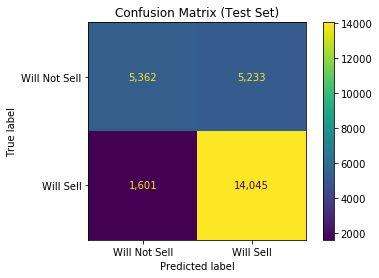

          | Train  | Test   |
          |-----------------|
Precision | 90.80% | 72.86% |
F1 Score  | 91.79% | 80.43% |
ROC-AUC   | 95.53% | 83.22% |


,Model,Precision,F1 Score,ROC-AUC
9,Decision Tree Test,72.86%,80.43%,83.22%
8,GridSearch LogReg,86.95%,86.33%,90.13%
7,LogReg,82.92%,87.26%,90.15%
6,KNN,89.98%,90.96%,91.08%
5,XGBoost,83.82%,88.84%,92.49%
4,Gradient Boosting,86.36%,89.23%,92.61%
3,GridSearch Random Forest,89.95%,91.11%,94.47%
2,Random Forest,89.90%,91.11%,94.54%
1,Tuned Decision Tree,79.49%,69.08%,68.61%
0,Vanilla Decision Tree,90.07%,90.88%,93.72%


In [47]:
sjs.evaluate('Decision Tree Test', dt3, X, X_test_new, y, y_test_new, use_decision_function='no')

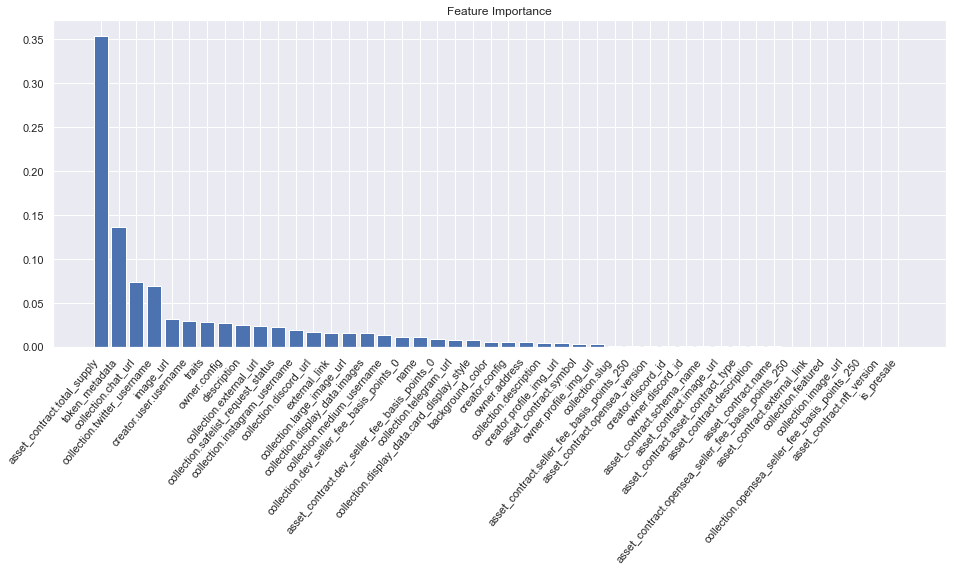

In [198]:
sjs.plot_feature_imp(dt3, X)

## Random Forest GS

In [48]:
rf3 = RandomForestClassifier(random_state=SEED)

param_grid = {'n_estimators' : [10, 100, 1000],
              'max_features' : [None, 'sqrt', 'log2']}

rf3_gs = GridSearchCV(rf2, param_grid, scoring='precision', cv=5, verbose=2)
rf3_gs.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................max_features=None, n_estimators=10; total time=   0.4s
[CV] END .................max_features=None, n_estimators=10; total time=   0.6s
[CV] END .................max_features=None, n_estimators=10; total time=   1.2s
[CV] END .................max_features=None, n_estimators=10; total time=   0.5s
[CV] END .................max_features=None, n_estimators=10; total time=   0.4s
[CV] END ................max_features=None, n_estimators=100; total time=   4.4s
[CV] END ................max_features=None, n_estimators=100; total time=   4.3s
[CV] END ................max_features=None, n_estimators=100; total time=   3.8s
[CV] END ................max_features=None, n_estimators=100; total time=   4.1s
[CV] END ................max_features=None, n_estimators=100; total time=   4.3s
[CV] END ...............max_features=None, n_estimators=1000; total time=  38.0s
[CV] END ...............max_features=None, n_esti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             scoring='precision', verbose=2)

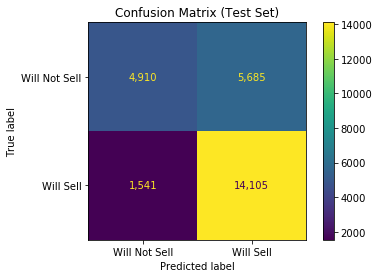

          | Train  | Test   |
          |-----------------|
Precision | 90.63% | 71.27% |
F1 Score  | 91.81% | 79.61% |
ROC-AUC   | 95.45% | 87.11% |


,Model,Precision,F1 Score,ROC-AUC
10,GS Random Forest Test,71.27%,79.61%,87.11%
9,Decision Tree Test,72.86%,80.43%,83.22%
8,GridSearch LogReg,86.95%,86.33%,90.13%
7,LogReg,82.92%,87.26%,90.15%
6,KNN,89.98%,90.96%,91.08%
5,XGBoost,83.82%,88.84%,92.49%
4,Gradient Boosting,86.36%,89.23%,92.61%
3,GridSearch Random Forest,89.95%,91.11%,94.47%
2,Random Forest,89.90%,91.11%,94.54%
1,Tuned Decision Tree,79.49%,69.08%,68.61%


In [49]:
sjs.evaluate('GS Random Forest Test', rf3_gs.best_estimator_, X, X_test_new, y, y_test_new, use_decision_function='no')

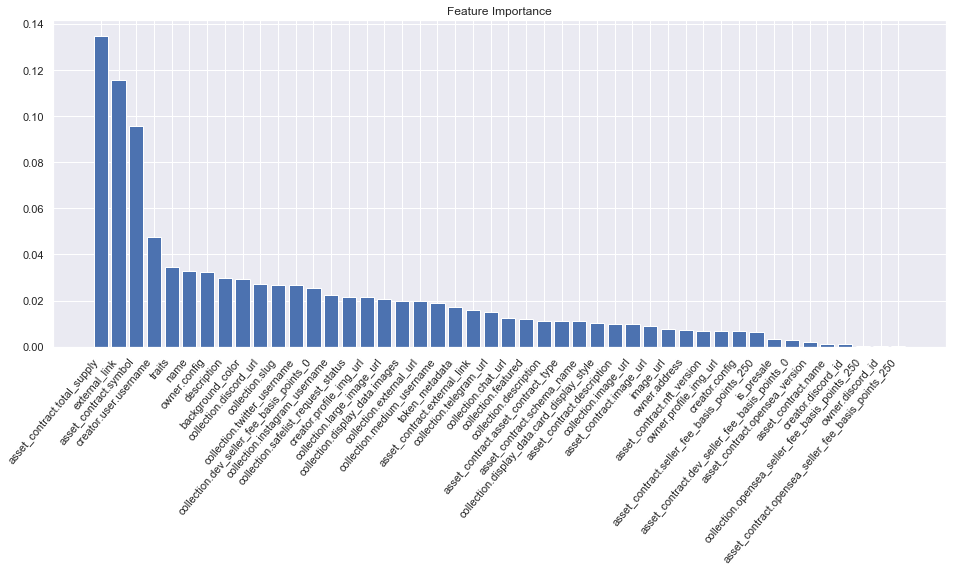

In [195]:
sjs.plot_feature_imp(rf3_gs.best_estimator_, X)

## Gradient Booster

In [50]:
GB2 = GradientBoostingClassifier()
GB2.fit(X, y)
sjs.crossval(GB2, X, y)

Avg Precision Score of 0.8431 with Std Dev of 0.1216

The scores were: ['0.7601', '0.6725', '0.8252', '0.9980', '0.9596']


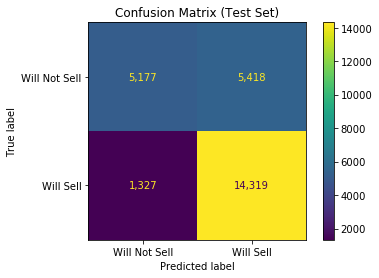

          | Train  | Test   |
          |-----------------|
Precision | 86.45% | 72.55% |
F1 Score  | 89.27% | 80.94% |
ROC-AUC   | 92.85% | 85.10% |


,Model,Precision,F1 Score,ROC-AUC
11,Gradient Booster Test,72.55%,80.94%,85.10%
10,GS Random Forest Test,71.27%,79.61%,87.11%
9,Decision Tree Test,72.86%,80.43%,83.22%
8,GridSearch LogReg,86.95%,86.33%,90.13%
7,LogReg,82.92%,87.26%,90.15%
6,KNN,89.98%,90.96%,91.08%
5,XGBoost,83.82%,88.84%,92.49%
4,Gradient Boosting,86.36%,89.23%,92.61%
3,GridSearch Random Forest,89.95%,91.11%,94.47%
2,Random Forest,89.90%,91.11%,94.54%


In [51]:
sjs.evaluate('Gradient Booster Test', GB2, X, X_test_new, y, y_test_new, use_decision_function='no')

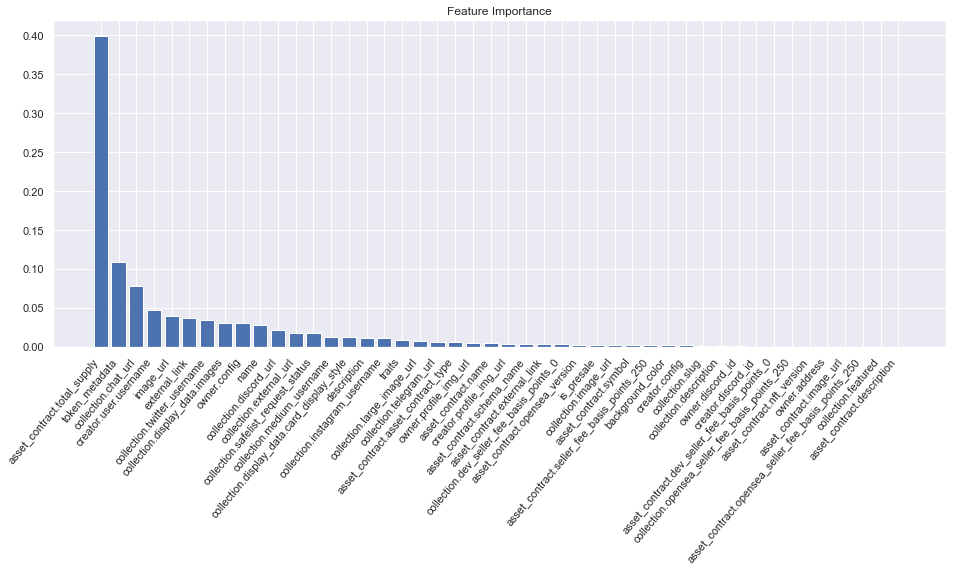

In [196]:
sjs.plot_feature_imp(GB2, X)

## KNN

In [52]:
knn2 = KNeighborsClassifier()
knn2.fit(X, y)
sjs.crossval(knn2, X, y)

Avg Precision Score of 0.8736 with Std Dev of 0.1039

The scores were: ['0.8510', '0.7189', '0.8206', '0.9982', '0.9794']


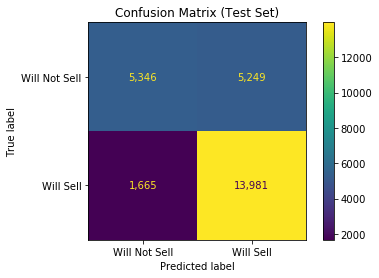

          | Train  | Test   |
          |-----------------|
Precision | 88.15% | 72.70% |
F1 Score  | 91.05% | 80.18% |
ROC-AUC   | 92.74% | 83.45% |


,Model,Precision,F1 Score,ROC-AUC
12,KNN Test,72.70%,80.18%,83.45%
11,Gradient Booster Test,72.55%,80.94%,85.10%
10,GS Random Forest Test,71.27%,79.61%,87.11%
9,Decision Tree Test,72.86%,80.43%,83.22%
8,GridSearch LogReg,86.95%,86.33%,90.13%
7,LogReg,82.92%,87.26%,90.15%
6,KNN,89.98%,90.96%,91.08%
5,XGBoost,83.82%,88.84%,92.49%
4,Gradient Boosting,86.36%,89.23%,92.61%
3,GridSearch Random Forest,89.95%,91.11%,94.47%


In [53]:
sjs.evaluate('KNN Test', knn2, X, X_test_new, y, y_test_new, use_decision_function='no')

## LogReg GS

In [54]:
lr3 = LogisticRegression()

param_grid = {'penalty' : ['l1', 'l2'],
              'C' : [100, 10, 1.0, 0.1, 0.01],
              'class_weight': [None, 'balanced'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}

lr3_gs = GridSearchCV(lr3, param_grid, scoring='precision', cv=5, verbose=2)
lr3_gs.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END C=100, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.1s
[CV] END C=100, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=100, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, class_weight=None, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, class_weight=None, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, class_weight=None, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, class_weight=None, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, class_weight=None, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l1, solver=liblinear; total time=  18.7s
[CV] END C=100, class_weight=None, penalty=l1, solver=liblinear; total time=  11.5s
[CV] END C=100, class_weight=None, penalty=l1, solver=liblinear; total time=  12.3s
[CV] END C=100, class_weight=None, penalty=l1, solver=liblinear; total time=  10.5s
[CV] EN

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=100, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.5s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=100, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=100, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=100, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=100, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=l

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   9.1s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=  10.1s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=  10.8s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=  20.9s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=  17.6s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.8s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.8s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=100, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=100, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=100, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=100, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=100, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, class_weight=None, penalty=l1, solver=lbfgs;

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   9.1s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=  15.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   9.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=  10.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   8.6s
[CV] END C=10, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END C=10, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END C=10, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END C=10, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END C=10, class_weight=None, penalty=l2, solver=newton-cg; total time=   1.1s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END ..C=10, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END ..C=10, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END ..C=10, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END ..C=10, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END ..C=10, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=lbfgs; total

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=  10.8s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=  11.8s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=  12.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=  11.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=  13.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.7s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=newton-cg; total time=52.3min
[CV] END C=10, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   3.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   2.1s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   3.5s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=10, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.7s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=10, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.7s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=10, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   1.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=10, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.6s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=10, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1.0, class_weight=None, penalty=l1, solver=lbfgs; 

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=1.0, class_weight=None, penalty=l1, solver=liblinear; total time=  12.2s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=liblinear; total time=  16.3s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=liblinear; total time=  21.5s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=liblinear; total time=  16.6s
[CV] END C=1.0, class_weight=None, penalty=l1, solver=liblinear; total time=   9.0s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.8s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=1.0, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=1.0, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=1.0, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=1.0, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.6s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=1.0, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END C=1.0, class_weight=None, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=l

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=liblinear; total time=  19.3s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=liblinear; total time=  15.6s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=liblinear; total time=  19.7s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=liblinear; total time=  11.7s
[CV] END C=1.0, class_weight=balanced, penalty=l1, solver=liblinear; total time=  11.1s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   1.1s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.8s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.5s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END C=1.0, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, class_weight=None, penalty=l1, solver=l

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=0.1, class_weight=None, penalty=l1, solver=liblinear; total time=   4.3s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=liblinear; total time=   3.3s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=liblinear; total time=   6.3s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=liblinear; total time=   4.2s
[CV] END C=0.1, class_weight=None, penalty=l1, solver=liblinear; total time=   1.6s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.5s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=0.1, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=0.1, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=0.1, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=0.1, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END .C=0.1, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=None, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=l

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   4.3s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   4.9s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   5.2s
[CV] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   5.9s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg; total time=   0.6s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, sol

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=lbfgs; total t

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/shawn/opt/anaconda3/envs/learn

[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END C=0.01, class_weight=balanced, p

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.2s


/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.80515715 0.80387717 0.80465005 0.80387717
        nan        nan 0.82081424 0.82083252 0.82041241 0.82083252
        nan        nan 0.80518483 0.80382034 0.80498165 0.80384763
        nan        nan 0.82081588 0.82081486 0.81360512 0.82071992
        nan        nan 0.80516767 0.80510671 0.80845391 0.80521845
        nan        nan 0.81350279 0.81370562 0.81362138 0.8136693
        nan        nan 0.79693921 0.80625369 0.80631844 0.80166914
        nan        nan 0.81303364 0.81274226 0.8117534  0.81287156
        nan        nan 0.79063735 0.79895493 0.79895493 0.79799701
        nan        nan 0.80265434 0.81704527 0.81704527 0.81065817]
  category=UserWarning


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='precision', verbose=2)

In [181]:
lr3_gs.best_estimator_.get_params()

{'C': 100,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

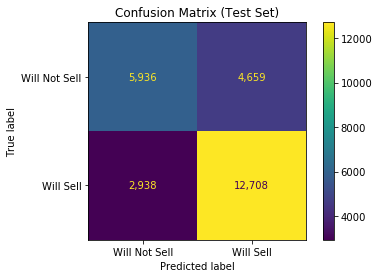

          | Train  | Test   |
          |-----------------|
Precision | 86.94% | 73.17% |
F1 Score  | 86.50% | 76.99% |
ROC-AUC   | 90.33% | 78.73% |


,Model,Precision,F1 Score,ROC-AUC
13,GridSearch LogReg Test,73.17%,76.99%,78.73%
12,KNN Test,72.70%,80.18%,83.45%
11,Gradient Booster Test,72.55%,80.94%,85.10%
10,GS Random Forest Test,71.27%,79.61%,87.11%
9,Decision Tree Test,72.86%,80.43%,83.22%
8,GridSearch LogReg,86.95%,86.33%,90.13%
7,LogReg,82.92%,87.26%,90.15%
6,KNN,89.98%,90.96%,91.08%
5,XGBoost,83.82%,88.84%,92.49%
4,Gradient Boosting,86.36%,89.23%,92.61%


In [55]:
sjs.evaluate('GridSearch LogReg Test', lr3_gs.best_estimator_, X, X_test_new, y, y_test_new, use_decision_function='yes')

In [186]:
coef_dict = {}
for coef, feat in zip(lr3_gs.best_estimator_.coef_[0,:],X.columns):
    coef_dict[feat] = coef

In [194]:
pd.DataFrame.from_dict(coef_dict, orient='index', columns=['coef']).sort_values(by=['coef'], ascending=False)

,coef
owner.discord_id,3.30
collection.slug,2.83
collection.image_url,2.41
asset_contract.nft_version,1.98
token_metadata,1.77
asset_contract.symbol,1.67
creator.user.username,1.25
collection.instagram_username,1.02
external_link,0.98
collection.twitter_username,0.78


# Combine Original & Test Binary Dataframes

In [60]:
df_full = pd.concat([df, df_test], ignore_index=True)

In [63]:
df_full.head()

,is_presale,collection.featured,asset_contract.dev_seller_fee_basis_points_0,collection.dev_seller_fee_basis_points_0,asset_contract.seller_fee_basis_points_250,asset_contract.opensea_seller_fee_basis_points_250,collection.opensea_seller_fee_basis_points_250,asset_contract.asset_contract_type,asset_contract.schema_name,asset_contract.name,...,description,external_link,image_url,name,owner.config,owner.discord_id,token_metadata,asset_contract.created_date,collection.created_date,target
0,1,0,1,0,1,1,1,0,0,1,...,0,1,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-06-10 01:49:35.180218,0
1,1,0,1,0,1,1,1,0,0,1,...,1,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-05-03 18:55:32.762585,0
2,1,0,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-05-19 07:24:46.125544,0
3,1,0,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-06-29 12:49:00.283468,0
4,1,0,1,0,1,1,1,0,0,1,...,0,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-05-30 16:45:39.254227,0
